<a href="https://colab.research.google.com/github/PedroTapia98/Distribuci-n-de-Sedimentos/blob/main/Sedimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución de Sedimentos

In [1]:
pip install spectral

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 KB 5.2 MB/s eta 0:00:00


In [2]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 6.7 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt 
from spectral import imshow
import rasterio

In [4]:
import numpy as np
from spectral import imshow, save_rgb
import functools
import matplotlib.pyplot as plt
from osgeo import gdal

b4 = gdal.Open('/content/drive/MyDrive/RT_LC08_L1TP_025049_20191106_20200825_02_T1_B4.TIF')
b5 = gdal.Open('/content/drive/MyDrive/RT_LC08_L1TP_025049_20191106_20200825_02_T1_B5.TIF')

B5 = b5.ReadAsArray()
B4 = b4.ReadAsArray()



## Abrir Imagenes


In [5]:
ds = gdal.Open('/content/drive/MyDrive/RT_LC08_L1TP_025049_20191106_20200825_02_T1_B4.TIF')
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

In [6]:
band = ds.GetRasterBand(1)
arrayb4 = band.ReadAsArray()

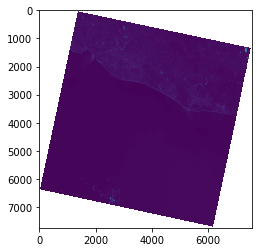

In [7]:
plt.figure()
plt.imshow(arrayb4)

In [8]:
ds = gdal.Open('/content/drive/MyDrive/RT_LC08_L1TP_025049_20191106_20200825_02_T1_B5.TIF')
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

In [9]:
band = ds.GetRasterBand(1)
arrayb5 = band.ReadAsArray()

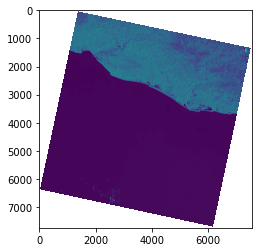

In [10]:
plt.figure()
plt.imshow(arrayb5)

## Aplicar filtrado de mediana

In [11]:
import cv2

In [12]:
 blur = cv2.blur(arrayb4,(3,3))

In [13]:
medianb4 = cv2.medianBlur(arrayb4,5)

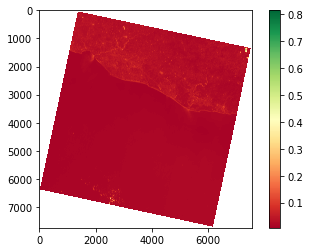

In [14]:
plt.imshow(medianb4, cmap='RdYlGn')
plt.colorbar()

In [15]:
medianb5 = cv2.medianBlur(arrayb5,5)

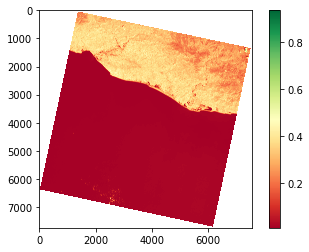

In [16]:
plt.imshow(medianb5, cmap='RdYlGn')
plt.colorbar()

## Aplicación del algoritmo TOPLISS


In [17]:
squares =  9.2*(medianb4/medianb5)+2.8*((medianb4/medianb5)*(medianb4/medianb5))+9.4

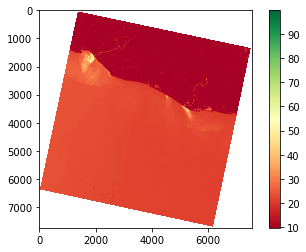

In [29]:
plt.imshow(squares, cmap='RdYlGn')
plt.colorbar()

### Zoom de la Imagen, delta de sedimentos

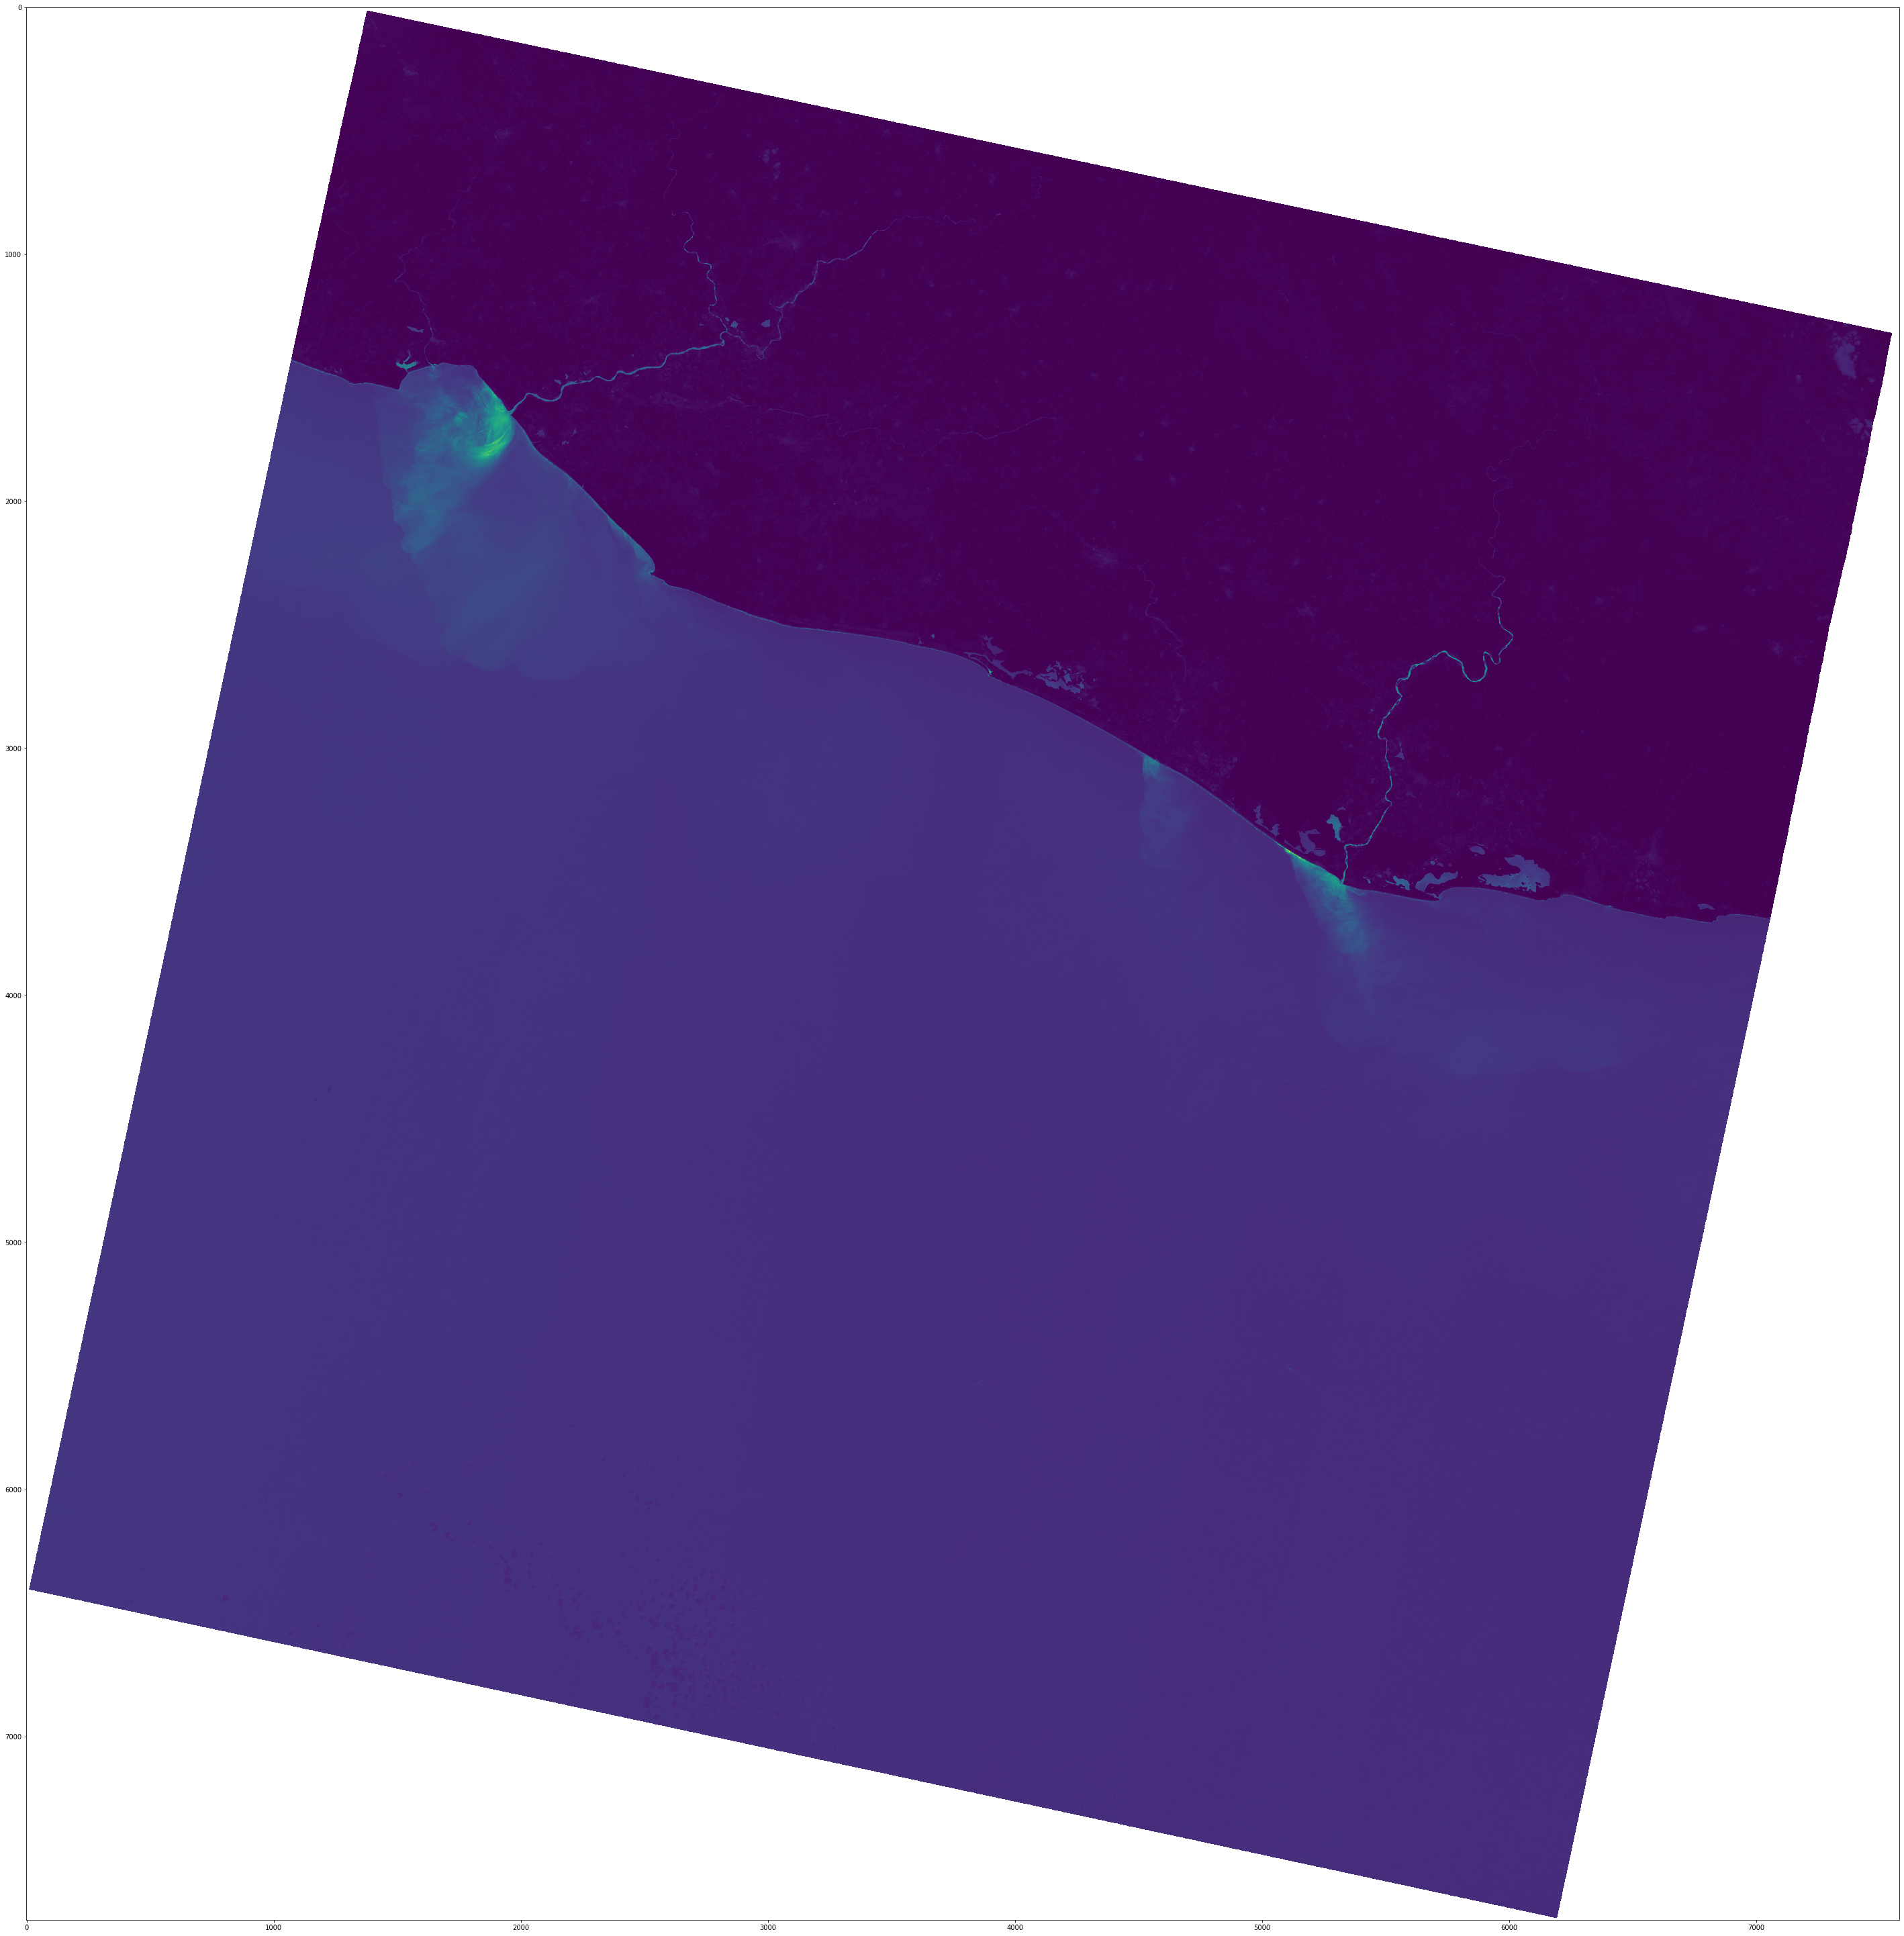

In [34]:
random = np.random.random ([8,90])

plt.figure(figsize = (50,100))
plt.imshow(squares, interpolation='nearest')
